# Working with personal data requests


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Your task

Import your own personal data file (or better yet, several of them!). Extract just the timestamp data. Export this timestamp data as a CSV file and save it on your machine.


### What if you have _other_ types of data?

A summary of pandas input/output (I/O) tools is [here](https://pandas.pydata.org/docs/user_guide/io.html). Here are some things we can directly import:
* CSVs
* JSON
* text (rtf, txt)
* HTML
* MS Excel
* Pickle (Python file format)
* Parquet
* And many others...

With HTML, you might want to parse it using Beautiful Soup.

For PDFs, you might need to use a tool like [Tabula](https://pypi.org/project/tabula-py/) (a Java tool, which runs in a Python wrapper) to extract the text from the PDF into a table format. _(Note: To use it, I had to install/update Java, and then install the Tabula package! A bit annoying, but not too bad...)_ Once I did that, though, it was fairly easy to run.

If you are having issues getting Tabula installed on your machine:
* make sure you try following the installation instructions [here](https://pypi.org/project/tabula-py/)
* you can also try running it in a Google Colab notebook, example [here](https://colab.research.google.com/github/chezou/tabula-py/blob/master/examples/tabula_example.ipynb)



In [30]:
ruth = pd.read_csv("Ruth_timestamps.csv")
ruth

,Unnamed: 0,ts
0,0,2023-06-19 02:58:03
1,1,2023-06-19 03:03:32
2,2,2023-06-19 03:10:21
3,3,2023-06-19 03:47:41
4,4,2023-06-19 03:54:56
...,...,...
12518,12518,2023-10-26 23:45:12
12519,12519,2023-10-26 23:47:49
12520,12520,2023-10-26 23:48:28
12521,12521,2023-10-26 23:49:15


In [35]:
ruth["ts"] = pd.to_datetime(ruth["ts"])

# Format the datetime without the timezone offset
ruth["ts"] = pd.to_datetime(ruth["ts"].dt.strftime("%Y-%m-%d %H:%M:%S"))
ruth["ts"].to_csv("Ruth_timestamps.csv")
ruth.sort_values(by="ts")
ruth

,Unnamed: 0,ts
0,0,2023-06-19 02:58:03
1,1,2023-06-19 03:03:32
2,2,2023-06-19 03:10:21
3,3,2023-06-19 03:47:41
4,4,2023-06-19 03:54:56
...,...,...
12518,12518,2023-10-26 23:45:12
12519,12519,2023-10-26 23:47:49
12520,12520,2023-10-26 23:48:28
12521,12521,2023-10-26 23:49:15


In [36]:
# Look at time difference
ruth["timeDifference"] = ruth["ts"].diff()
ruth

,Unnamed: 0,ts,timeDifference
0,0,2023-06-19 02:58:03,NaT
1,1,2023-06-19 03:03:32,0 days 00:05:29
2,2,2023-06-19 03:10:21,0 days 00:06:49
3,3,2023-06-19 03:47:41,0 days 00:37:20
4,4,2023-06-19 03:54:56,0 days 00:07:15
...,...,...,...
12518,12518,2023-10-26 23:45:12,0 days 00:01:26
12519,12519,2023-10-26 23:47:49,0 days 00:02:37
12520,12520,2023-10-26 23:48:28,0 days 00:00:39
12521,12521,2023-10-26 23:49:15,0 days 00:00:47


In [61]:
# What is the longest time between timestamps? What is the average time between timestamps?

r_longest = ruth["timeDifference"].max()
r_mean = ruth["timeDifference"].mean()
r_longest

Timedelta('2 days 18:20:10')

In [39]:
# What is the day with the most timestamps? How many events (timestamps) were on that day? 
# Have date column

ruth = ruth.dropna()
ruth["date"] = pd.DatetimeIndex(ruth["ts"]).date 
ruth


,Unnamed: 0,ts,timeDifference,date
1,1,2023-06-19 03:03:32,0 days 00:05:29,2023-06-19
2,2,2023-06-19 03:10:21,0 days 00:06:49,2023-06-19
3,3,2023-06-19 03:47:41,0 days 00:37:20,2023-06-19
4,4,2023-06-19 03:54:56,0 days 00:07:15,2023-06-19
5,5,2023-06-19 03:58:01,0 days 00:03:05,2023-06-19
...,...,...,...,...
12518,12518,2023-10-26 23:45:12,0 days 00:01:26,2023-10-26
12519,12519,2023-10-26 23:47:49,0 days 00:02:37,2023-10-26
12520,12520,2023-10-26 23:48:28,0 days 00:00:39,2023-10-26
12521,12521,2023-10-26 23:49:15,0 days 00:00:47,2023-10-26


In [40]:
# Count the occurrences on each date

r_date_counts = ruth["date"].value_counts()
r_date_counts


date
2023-09-06    730
2023-08-03    416
2023-08-02    386
2023-09-08    362
2023-10-19    316
             ... 
2023-07-30      7
2023-06-21      4
2023-08-25      3
2023-10-08      2
2023-07-03      2
Name: count, Length: 125, dtype: int64

In [51]:
# Get the date with the most timestamps and the corresponding count

r_most_ts_date = ruth["ts_count_per_date"].idxmax()
r_date_ts_count = ruth["ts_count_per_date"].max()
most_ts_date = ruth.loc[r_most_ts_date, "date"]
print("The day with the most timestamps for Ruth's data is {} with {} events (timestamps) on this day.".format(most_ts_date, r_date_ts_count))

The day with the most timestamps for Ruth's data is 2023-09-06 with 730 events (timestamps) on this day.


In [52]:
# What is the month with the most timestamps? How many events (timestamps) were on that month?
# Have month column

ruth["month"] = pd.DatetimeIndex(ruth["ts"]).month
ruth 

,Unnamed: 0,ts,timeDifference,date,ts_count_per_date,month,ts_count_per_month
1,1,2023-06-19 03:03:32,0 days 00:05:29,2023-06-19,14,6,447
2,2,2023-06-19 03:10:21,0 days 00:06:49,2023-06-19,14,6,447
3,3,2023-06-19 03:47:41,0 days 00:37:20,2023-06-19,14,6,447
4,4,2023-06-19 03:54:56,0 days 00:07:15,2023-06-19,14,6,447
5,5,2023-06-19 03:58:01,0 days 00:03:05,2023-06-19,14,6,447
...,...,...,...,...,...,...,...
12518,12518,2023-10-26 23:45:12,0 days 00:01:26,2023-10-26,37,10,2852
12519,12519,2023-10-26 23:47:49,0 days 00:02:37,2023-10-26,37,10,2852
12520,12520,2023-10-26 23:48:28,0 days 00:00:39,2023-10-26,37,10,2852
12521,12521,2023-10-26 23:49:15,0 days 00:00:47,2023-10-26,37,10,2852


In [53]:
# Count the occurrences of each month and examine

r_month_counts = ruth["month"].value_counts()
r_month_counts


month
9     4218
10    2852
8     2683
7     2322
6      447
Name: count, dtype: int64

In [54]:
# Create column for ts count
# Group by 'month' and count occurrences of 'ts'

ruth["ts_count_per_month"] = ruth.groupby("month")["ts"].transform("count")
ruth

,Unnamed: 0,ts,timeDifference,date,ts_count_per_date,month,ts_count_per_month
1,1,2023-06-19 03:03:32,0 days 00:05:29,2023-06-19,14,6,447
2,2,2023-06-19 03:10:21,0 days 00:06:49,2023-06-19,14,6,447
3,3,2023-06-19 03:47:41,0 days 00:37:20,2023-06-19,14,6,447
4,4,2023-06-19 03:54:56,0 days 00:07:15,2023-06-19,14,6,447
5,5,2023-06-19 03:58:01,0 days 00:03:05,2023-06-19,14,6,447
...,...,...,...,...,...,...,...
12518,12518,2023-10-26 23:45:12,0 days 00:01:26,2023-10-26,37,10,2852
12519,12519,2023-10-26 23:47:49,0 days 00:02:37,2023-10-26,37,10,2852
12520,12520,2023-10-26 23:48:28,0 days 00:00:39,2023-10-26,37,10,2852
12521,12521,2023-10-26 23:49:15,0 days 00:00:47,2023-10-26,37,10,2852


In [55]:
# Get the month with the most timestamps and the corresponding count

r_most_ts_month = ruth["ts_count_per_month"].idxmax()
r_month_ts_count = ruth["ts_count_per_month"].max()
most_ts_month = ruth.loc[r_most_ts_month, "month"]
print("The month with the most timestamps for Ruth's data is {} with {} events (timestamps) on this month.".format(most_ts_month, r_month_ts_count))

The month with the most timestamps for Ruth's data is 9 with 4218 events (timestamps) on this month.


/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


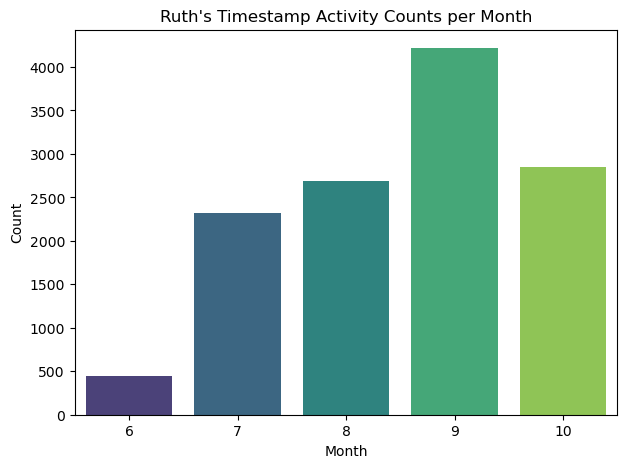

In [63]:
# Create at least one visualization of this data, using matplotlib/pyplot or Seaborn 

plt.figure(figsize=(7, 5))
sns.barplot(x="month", y="ts_count_per_month", data=ruth, palette="viridis")
plt.title("Ruth's Timestamp Activity Counts per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

In [58]:
# Count the occurrences on each day and examine

r_date_counts = ruth["date"].value_counts()
r_date_counts

date
2023-09-06    730
2023-08-03    416
2023-08-02    386
2023-09-08    362
2023-10-19    316
             ... 
2023-07-30      7
2023-06-21      4
2023-08-25      3
2023-10-08      2
2023-07-03      2
Name: count, Length: 125, dtype: int64

In [59]:
# Create column for ts count
# Group by 'month' and count occurrences of 'ts'

ruth["ts_count_per_date"] = ruth.groupby("date")["ts"].transform("count")
ruth

,Unnamed: 0,ts,timeDifference,date,ts_count_per_date,month,ts_count_per_month
1,1,2023-06-19 03:03:32,0 days 00:05:29,2023-06-19,14,6,447
2,2,2023-06-19 03:10:21,0 days 00:06:49,2023-06-19,14,6,447
3,3,2023-06-19 03:47:41,0 days 00:37:20,2023-06-19,14,6,447
4,4,2023-06-19 03:54:56,0 days 00:07:15,2023-06-19,14,6,447
5,5,2023-06-19 03:58:01,0 days 00:03:05,2023-06-19,14,6,447
...,...,...,...,...,...,...,...
12518,12518,2023-10-26 23:45:12,0 days 00:01:26,2023-10-26,37,10,2852
12519,12519,2023-10-26 23:47:49,0 days 00:02:37,2023-10-26,37,10,2852
12520,12520,2023-10-26 23:48:28,0 days 00:00:39,2023-10-26,37,10,2852
12521,12521,2023-10-26 23:49:15,0 days 00:00:47,2023-10-26,37,10,2852


In [60]:
# Get the date with the most timestamps and the corresponding count

r_most_ts_date = ruth["ts_count_per_date"].idxmax()
r_date_ts_count = ruth["ts_count_per_date"].max()
most_ts_date = ruth.loc[r_most_ts_date, "date"]
print("The day with the most timestamps for Ruth's data is on {} with {} events (timestamps) on this day.".format(most_ts_date, r_date_ts_count))

The day with the most timestamps for Ruth's data is on 2023-09-06 with 730 events (timestamps) on this day.


We can see that there is an upward trend up until month 9. It seems that in  month 9 there is peak timestamp activity.

#### What is the source of this data? 
Write a few sentences explaining your reasoning, as well as what other data might help you verify if you are correct?

For the days and months that your partner identified as having the most timestamps in your data, try to figure out what was happening on those days. What other data might help you figure this out?

In [ ]:
audrey = pd.read_csv("audrey_timestamps.csv")
audrey["endTime"] = pd.to_datetime(audrey["endTime"])
audrey.sort_values(by="endTime")